# Audio Classification with CNN model 
- CNN train with real audio file (1 second time duration). 
- Using normalize sound between -1 to 1 , noise reduce and calculate spectrogram to train CNN

In [1]:
import os
import librosa # type: ignore
import librosa.display # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Load example a drone audio file
audio_file = 'D:\\SF-67\\dataset\\Drone\\Drone_0.wav'  # Replace with your audio file path
y, fs = librosa.load(audio_file)  # , duration=20)
timesDuration = librosa.get_duration(y=y, sr=fs)

# normalize audio  
max_value = np.max(np.abs(y))       # Determine the maximum values
audio_Drone = y/max_value           # Use max_value and normalize sound data to get values between -1 & +1

print(f'Sampling Rate: {fs} Hz')
print(f'Audio Duration: {timesDuration:.0f} seconds')

Sampling Rate: 22050 Hz
Audio Duration: 1 seconds


In [2]:
from IPython.display import Audio  # type: ignore

Audio(data=audio_Drone, rate=fs)

# Spectrogram Calculate 
Calculate Spectrogram by using SFTF method

In [3]:
# Calculate Spectrogram by using SFTF method
def spectrogram_cal(data,fs):
    ms = librosa.feature.melspectrogram(y=data, sr=fs, n_fft=2048, hop_length=128, n_mels=256)
    spectrogram_db = librosa.power_to_db(ms, ref=np.max)
    
    return spectrogram_db

# FFT Calculate
1-D discrete Fourier transforms 

In [4]:
from scipy.fft import fft, fftfreq # type: ignore

# ----- 1-D discrete Fourier transforms ------
def audioFFT_cal (data,fs):
    N = int(fs * timesDuration)         #   Number of sample points

    T = 1.0 / (fs)   # sample spacing
    x = np.linspace(0.0, N*T, N, endpoint=False)
    yf = fft(data)
    Xf = fftfreq(N, T)[:N//2]
    FFT_Amplitude = 10*np.log(np.abs(yf[0:N//2]))
    
    return Xf,FFT_Amplitude

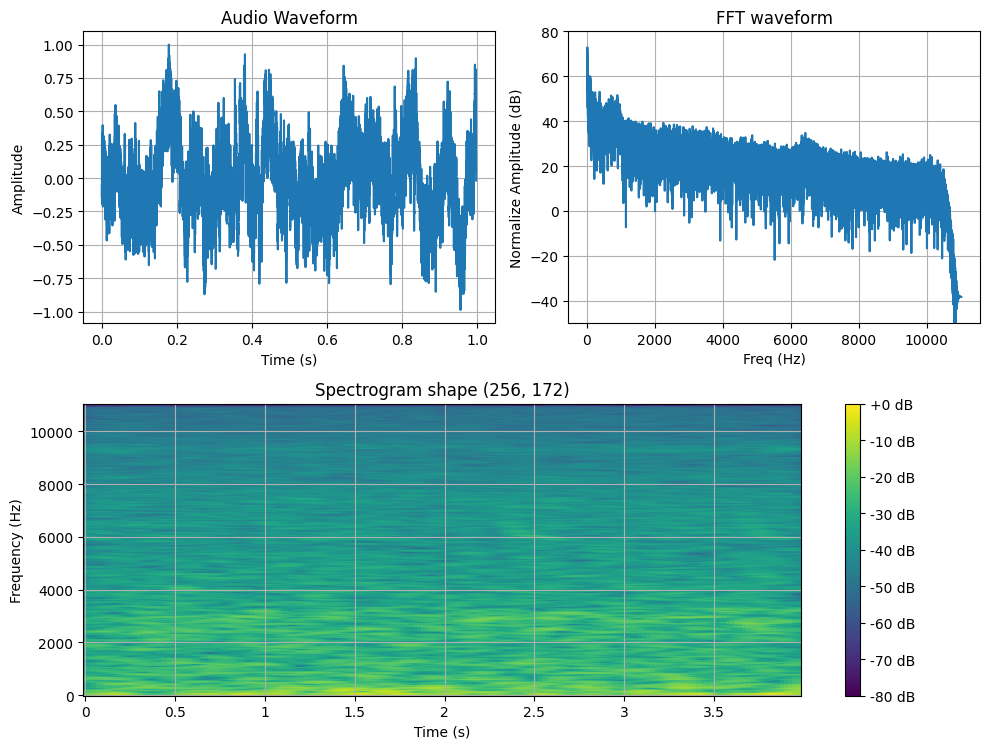

In [5]:
y_signal = audio_Drone

plt.figure(figsize=(10, 8))
# ----- Plot Audio Waveform  -----
plt.subplot(2, 2, 1)
plt.title(f'Audio Waveform')
plt.plot(np.linspace(0, len(y_signal) / fs, len(y_signal)), y_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
# ----- Plot FFT  -----
xf,yf = audioFFT_cal(y_signal,fs)    
plt.subplot(2, 2, 2)
plt.title(f'FFT waveform')
plt.plot(xf, yf)
plt.grid()
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalize Amplitude (dB)')
plt.ylim(-50,80)

# ------- Plot Spectrogram ---------
spectrogram_db = spectrogram_cal(y_signal,fs)
plt.subplot(2, 1, 2)
plt.title(f'Spectrogram')
librosa.display.specshow(spectrogram_db, sr=fs, x_axis='time', y_axis='linear', cmap='viridis')
#cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram shape {spectrogram_db.shape}')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Data Pre-Processing
- load all sound in directory 
- normalize sound between -1 to 1 , noise reduce and calculate spectrogram to train CNN

In [6]:
import noisereduce as nr        # type: ignore
from skimage import exposure         # type: ignore

# Set the path to dataset folder
print("#: Set the path to dataset folder")
data_dir = "D:\\SF-67\\dataset"

# parameter config
labels = ['Drone','No_Drone']
spectrogram_input = []
target_labels = []

stationary=True
prop_decrease=1
n_std_thresh_stationary = 1

for label in labels:
    label_dir = os.path.join(data_dir, label)
    for audio_file in os.listdir(label_dir):
        audio_path = os.path.join(label_dir, audio_file)
        print(audio_path)
        
        try:
            # Import Audio File
            audio_original, sr = librosa.load(audio_path)  # Load audio and limit to 3 seconds

                    # normalize audio  
            max_value = np.max(np.abs(audio_original))       # Determine the maximum values
            audio_normalize = audio_original/max_value        # Use max_value and normalize sound data to get values between -1 & +1

                    # perform noise reduction
            audio_reduced_noise = nr.reduce_noise(y=audio_normalize, 
                                                sr=fs, 
                                                stationary=stationary, 
                                                prop_decrease=prop_decrease,
                                                n_std_thresh_stationary=n_std_thresh_stationary)    # ,use_torch=True )

            spectrogram = spectrogram_cal(audio_reduced_noise,fs)
            #image_adapteq = exposure.equalize_hist((spectrogram))
            
            # Transpose the spectrogram to have the shape (timesteps, n_mels)
            spectrogram_input.append(spectrogram)
            target_labels.append(label)
            
        except:
            print(f'Error audio File: {audio_path}')

c:\Users\panya\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#: Set the path to dataset folder
D:\SF-67\dataset\Drone\Drone_0.wav
D:\SF-67\dataset\Drone\Drone_1.wav
D:\SF-67\dataset\Drone\Drone_10.wav
D:\SF-67\dataset\Drone\Drone_100.wav
D:\SF-67\dataset\Drone\Drone_1000.wav
D:\SF-67\dataset\Drone\Drone_1001.wav
D:\SF-67\dataset\Drone\Drone_1002.wav
D:\SF-67\dataset\Drone\Drone_1003.wav
D:\SF-67\dataset\Drone\Drone_1004.wav
D:\SF-67\dataset\Drone\Drone_1005.wav
D:\SF-67\dataset\Drone\Drone_1006.wav
D:\SF-67\dataset\Drone\Drone_1007.wav
D:\SF-67\dataset\Drone\Drone_1008.wav
D:\SF-67\dataset\Drone\Drone_1009.wav
D:\SF-67\dataset\Drone\Drone_101.wav
D:\SF-67\dataset\Drone\Drone_1010.wav
D:\SF-67\dataset\Drone\Drone_1011.wav
D:\SF-67\dataset\Drone\Drone_1012.wav
D:\SF-67\dataset\Drone\Drone_1013.wav
D:\SF-67\dataset\Drone\Drone_1014.wav
D:\SF-67\dataset\Drone\Drone_1015.wav
D:\SF-67\dataset\Drone\Drone_1016.wav
D:\SF-67\dataset\Drone\Drone_1017.wav
D:\SF-67\dataset\Drone\Drone_1018.wav
D:\SF-67\dataset\Drone\Drone_1019.wav
D:\SF-67\dataset\Drone\Dro

C:\Users\panya\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


Error audio File: D:\SF-67\dataset\No_Drone\Capture-2024-11-30 23_48_57.185671.wav
D:\SF-67\dataset\No_Drone\Capture-2024-11-30 23_48_58.228324.wav
Error audio File: D:\SF-67\dataset\No_Drone\Capture-2024-11-30 23_48_58.228324.wav
D:\SF-67\dataset\No_Drone\Capture-2024-11-30 23_48_59.261836.wav
Error audio File: D:\SF-67\dataset\No_Drone\Capture-2024-11-30 23_48_59.261836.wav
D:\SF-67\dataset\No_Drone\Capture-2024-11-30 23_49_00.291285.wav
Error audio File: D:\SF-67\dataset\No_Drone\Capture-2024-11-30 23_49_00.291285.wav
D:\SF-67\dataset\No_Drone\Capture-2024-11-30 23_49_01.325810.wav
Error audio File: D:\SF-67\dataset\No_Drone\Capture-2024-11-30 23_49_01.325810.wav
D:\SF-67\dataset\No_Drone\Capture-2024-11-30 23_49_02.339921.wav
Error audio File: D:\SF-67\dataset\No_Drone\Capture-2024-11-30 23_49_02.339921.wav
D:\SF-67\dataset\No_Drone\Capture-2024-11-30 23_49_03.524769.wav
Error audio File: D:\SF-67\dataset\No_Drone\Capture-2024-11-30 23_49_03.524769.wav
D:\SF-67\dataset\No_Drone\Cap

# Save and load training data 
- directory : DatasetForTrain
- spectrogram_input
- target_labels

In [7]:
import pickle

# save dataset
with open('D:\\SF-67\\ExtractDataset\\spectrogram_input', 'wb') as fp:
    pickle.dump(spectrogram_input, fp)

with open('D:\\SF-67\\ExtractDataset\\target_labels', 'wb') as fp:
     pickle.dump(target_labels, fp)

with open('D:\\SF-67\\ExtractDataset\\labels', 'wb') as fp:
    pickle.dump(labels, fp)

In [8]:
import pickle

# load dataset
with open ('D:\\SF-67\\ExtractDataset\\spectrogram_input', 'rb') as fp:
    spectrogram_input = pickle.load(fp)

with open ('D:\\SF-67\\ExtractDataset\\target_labels', 'rb') as fp:
     target_labels = pickle.load(fp)

with open ('D:\\SF-67\\ExtractDataset\\labels', 'rb') as fp:
    labels = pickle.load(fp)

# Encoding targets 

In [9]:
# Support Python 3.9 only
from tensorflow.keras.utils import to_categorical # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore

print("#: Encoding targets and data-splitting")
print("labels : " + str(labels))

# Encode target labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(target_labels)
Y_label = to_categorical(encoded_labels)
print(f'Encode target labels : {Y_label[0]}')

#: Encoding targets and data-splitting
labels : ['Drone', 'No_Drone']
Encode target labels : [1. 0.]


# Split data into train and test sets
Convert input data to ndarray and split data to train and test Model

In [10]:
from sklearn.model_selection import train_test_split # type: ignore

# Set the path to dataset folder
print("#: Set the path to dataset folder")
data_dir = "D:\\SF-67\\dataset"

X = np.array(spectrogram_input)
y = np.array(Y_label)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

xtrain, xtest, ytrain, ytest = train_test_split(X,y, train_size =0.9, random_state=42 )

# Normalize the data
xtrain = xtrain / 255.0
xtest = xtest / 255.0

print("xtrain shape : " + str(xtrain.shape))
print("xtest shape : " + str(xtest.shape))
print("ytrain shape : " + str(ytrain.shape))
print("ytest shape : " + str(ytest.shape))

######## Exploratory data analysis #######
# Count the number of samples in each class
print()
print("#: Count the number of samples in each class")
class_counts = [len(os.listdir(os.path.join(data_dir, label))) for label in labels]

print("Total Data set: " + str(int(class_counts[0]) + int(class_counts[1])))
print(labels[0] + ": " + str(class_counts[0]))
print(labels[1] + ": " + str(class_counts[1]))
print()

print("Data set for Train: " + str(xtrain.shape[0]))
print("Data set for Test: " + str(xtest.shape[0]))

#: Set the path to dataset folder
xtrain shape : (11183, 256, 172, 1)
xtest shape : (1243, 256, 172, 1)
ytrain shape : (11183, 2)
ytest shape : (1243, 2)

#: Count the number of samples in each class
Total Data set: 14475
Drone: 5673
No_Drone: 8802

Data set for Train: 11183
Data set for Test: 1243


# Model training

In [11]:
import keras # type: ignore
import tensorflow as tf # type: ignore

# Create the convolutional base
model = keras.Sequential([
        keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=xtrain.shape[1:]),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128,(3,3) , activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Dense(64),
        keras.layers.Dense(32),
        keras.layers.Dense(16),
        keras.layers.Flatten(),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 170, 128)     1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 85, 128)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 83, 128)      147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 41, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 62, 41, 64)        8256      
_________________________________________________________________
dense_1 (Dense)              (None, 62, 41, 32)        2080      
_________________________________________________________________
dense_2 (Dense)              (None, 62, 41, 16)        5

In [ ]:
hist = model.fit(xtrain, 
                 ytrain, 
                 validation_data=(xtest, ytest), 
                 batch_size=40, 
                 epochs=50)  

Epoch 1/50
 66/280 [======>.......................] - ETA: 33s - loss: 1.0864 - accuracy: 0.6436

KeyboardInterrupt: 

: 

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, ':', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [ ]:
import pandas as pd # type: ignore
import datetime

directory_name = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
os.mkdir('D:\\SF-67\\model\\' + directory_name)

metrics = pd.DataFrame(model.history.history)
metrics.to_csv('D:\\SF-67\\model\\' + directory_name + '\\hist.csv', index=False)

model.save('D:\\SF-67\\model\\' + directory_name + '\\myModel.h5') # save model

with open('D:\\SF-67\\model\\' + directory_name + '\\labels', 'wb') as fp:
    pickle.dump(labels, fp)

In [ ]:
# load model
from tensorflow.keras.models import load_model # type: ignore

myModel = load_model('D:\\SF-67\\model\\' + directory_name + '\\myModel.h5') #same file path
myModel.summary()

loss, acc = myModel.evaluate(xtest, ytest, verbose=0)
print(f"test accuracy {acc*100}")
print(f"test loss {loss*100}")


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report , confusion_matrix # type: ignore
import seaborn as sns # type: ignore

y_predicted = myModel.predict(xtest)
mat = confusion_matrix(ytest.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['Drone', 'NoDrone']

# Calculate accuracy and F1 score
print("#: Calculate accuracy and F1 score")
accuracy = accuracy_score(ytest.argmax(axis=1), y_predicted.argmax(axis=1))

f1 = f1_score(ytest.argmax(axis=1), y_predicted.argmax(axis=1))

print(f"Accuracy: {accuracy * 100:.2f}%")
#print('Accuracy: {:.2f}'.format(accuracy))
print('F1 score: {:.2f}'.format(f1))

# Print classification report
print(classification_report(ytest.argmax(axis=1), y_predicted.argmax(axis=1), target_names=class_labels))

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)


In [ ]:
# Support Python 3.9 only
from tensorflow.keras.utils import to_categorical # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore

print("#: Encoding targets and data-splitting")
print("labels : " + str(labels))

# Encode target labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(target_labels)
Y_label = to_categorical(encoded_labels)
print(f'Encode target labels : {Y_label[0]}')

In [ ]:
# Apply Model 
Ytest = xtest[1]

Ytest = Ytest.reshape(1, Ytest.shape[0], Ytest.shape[1], 1)
y_predicted = myModel.predict(Ytest)
output =  y_predicted.argmax(axis=1)

lable_Output = label_encoder.inverse_transform(output)

print(f'Predicted Output : {y_predicted}')
print(f'Output Valve : {output}')
print(f'Output Lable : {lable_Output}')